In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models, regularizers

In [52]:
df = pd.read_csv('mnist_784_csv.csv')

In [53]:
x_data = df.iloc[:,:-1].values
labels = df.iloc[:,-1].values

In [54]:
x_data = x_data / 255.0

In [55]:
x_train , x_test = train_test_split(x_data , test_size = 0.2 , random_state = 42)

In [56]:
x_train.shape

(56000, 784)

In [57]:
# Reshape data to 28x28x1
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [58]:
# Add random noise to the images
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

In [59]:
# Clip the pixel values to stay between 0 and 1
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [60]:
# Build the autoencoder
input_img = layers.Input(shape=(28, 28, 1))

In [61]:
# Encoder
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)

In [62]:
# Decoder
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)


In [63]:
# Compile the model
autoencoder = models.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


In [64]:
# Train the autoencoder
autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test)) 

Epoch 1/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 59s 256ms/step - loss: 0.3210 - val_loss: 0.1280
Epoch 2/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 57s 261ms/step - loss: 0.1242 - val_loss: 0.1164
Epoch 3/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 80s 248ms/step - loss: 0.1153 - val_loss: 0.1111
Epoch 4/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 50s 230ms/step - loss: 0.1106 - val_loss: 0.1084
Epoch 5/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 88s 254ms/step - loss: 0.1080 - val_loss: 0.1064
Epoch 6/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 83s 255ms/step - loss: 0.1061 - val_loss: 0.1049
Epoch 7/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 58s 263ms/step - loss: 0.1051 - val_loss: 0.1038
Epoch 8/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 81s 255ms/step - loss: 0.1040 - val_loss: 0.1029
Epoch 9/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 80s 241ms/step - loss: 0.1030 - val_loss: 0.1021
Epoch 10/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 53s 240ms/step - loss: 0.1023 - val_loss: 0.1015


In [65]:
# Denoise test images
denoised_imgs = autoencoder.predict(x_test_noisy) 

438/438 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step


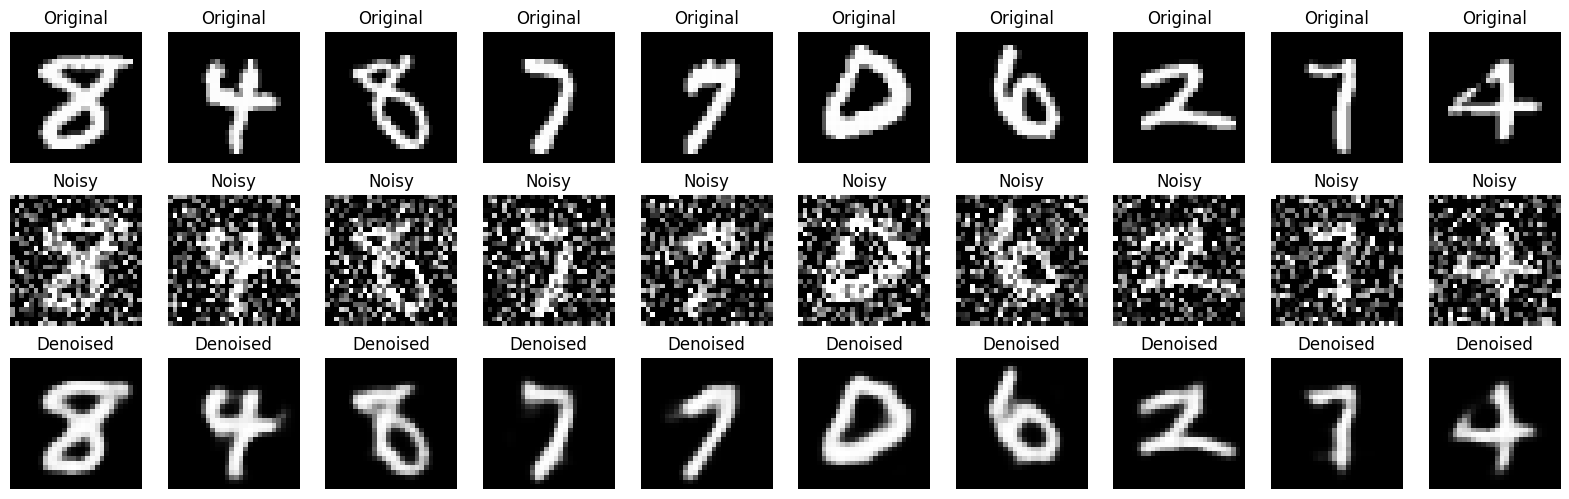

In [66]:
n = 10  # Number of images to display
plt.figure(figsize=(20, 6))
for i in range(n):
    # Original images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Noisy images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    plt.title("Noisy")
    plt.axis('off')

    # Denoised images
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(denoised_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Denoised")
    plt.axis('off')

plt.show()